In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
import sys
sys.path.append('../../code')

from splits import get_hi_split

In [3]:
hiv = pd.read_csv('../../data/raw/HIV.csv')
hiv['value'] = hiv['HIV_active']
hiv = hiv.drop(labels=['activity', 'HIV_active'], axis=1)
hiv

,smiles,value
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,0
4,O=S(=O)(O)CCS(=O)(=O)O,0
...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,0
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,0
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,0
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,0


In [4]:
hiv['value'].mean()

0.03508643956524911

[12:55:41] WARNING: not removing hydrogen atom without neighbors
[12:55:41] WARNING: not removing hydrogen atom without neighbors
[12:58:43] WARNING: not removing hydrogen atom without neighbors
[12:58:43] WARNING: not removing hydrogen atom without neighbors
[12:59:26] WARNING: not removing hydrogen atom without neighbors
[12:59:26] WARNING: not removing hydrogen atom without neighbors


Train: 32901 test: 2375


Text(0.5, 1.0, 'Shortest distance between train and test')

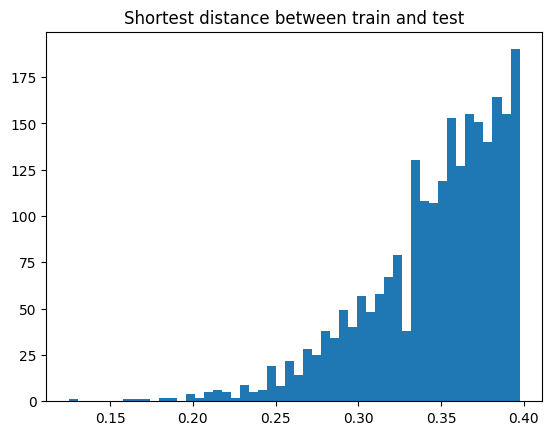

In [5]:
train_1, test_1, sim_1 = get_hi_split(hiv, threshold=0.4, seed=322, cutoff=0.55)
print('Train: ' + str(len(train_1)) + ' test: ' + str(len(test_1)))
plt.hist(sim_1, bins=50)
plt.title('Shortest distance between train and test')

[12:59:46] WARNING: not removing hydrogen atom without neighbors
[12:59:46] WARNING: not removing hydrogen atom without neighbors
[13:03:11] WARNING: not removing hydrogen atom without neighbors
[13:03:11] WARNING: not removing hydrogen atom without neighbors
[13:03:52] WARNING: not removing hydrogen atom without neighbors
[13:03:52] WARNING: not removing hydrogen atom without neighbors


Train: 32901 test: 2242


Text(0.5, 1.0, 'Shortest distance between train and test')

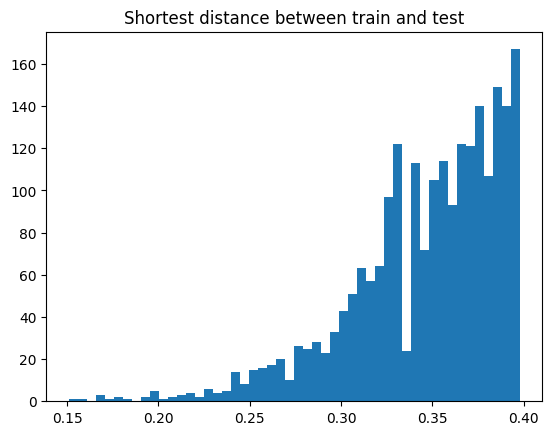

In [6]:
train_2, test_2, sim_2 = get_hi_split(hiv, threshold=0.4, seed=31662, cutoff=0.55)
print('Train: ' + str(len(train_2)) + ' test: ' + str(len(test_2)))
plt.hist(sim_2, bins=50)
plt.title('Shortest distance between train and test')

[13:04:08] WARNING: not removing hydrogen atom without neighbors
[13:04:08] WARNING: not removing hydrogen atom without neighbors
[13:07:11] WARNING: not removing hydrogen atom without neighbors
[13:07:11] WARNING: not removing hydrogen atom without neighbors
[13:07:49] WARNING: not removing hydrogen atom without neighbors
[13:07:49] WARNING: not removing hydrogen atom without neighbors


Train: 32901 valid: 2285


Text(0.5, 1.0, 'Shortest distance between train and test')

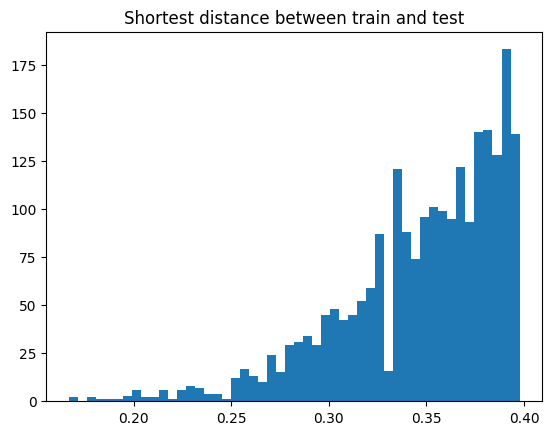

In [7]:
train_3, test_3, sim_3 = get_hi_split(hiv, threshold=0.4, seed=228, cutoff=0.55)
print('Train: ' + str(len(train_3)) + ' valid: ' + str(len(test_3)))
plt.hist(sim_3, bins=50)
plt.title('Shortest distance between train and test')

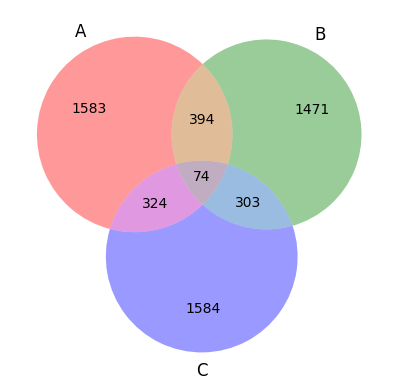

In [8]:
venn3([
    set(test_1['smiles'].tolist()),
    set(test_2['smiles'].tolist()),
    set(test_3['smiles'].tolist()),
])

In [9]:
train_1.to_csv('../../data/hi/hiv_greedy/train_1.csv')
train_2.to_csv('../../data/hi/hiv_greedy/train_2.csv')
train_3.to_csv('../../data/hi/hiv_greedy/train_3.csv')

In [10]:
test_1.to_csv('../../data/hi/hiv_greedy/test_1.csv')
test_2.to_csv('../../data/hi/hiv_greedy/test_2.csv')
test_3.to_csv('../../data/hi/hiv_greedy/test_3.csv')